In [1]:
import os
import pandas as pd
import numpy as np
from numpy.random import random, uniform, dirichlet, choice
from numpy.linalg import inv
import pandas_datareader as web
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from ticker_download_predict_upload import DownloadPredictUpload

### Set the seed

In [2]:
np.random.seed(1)

### Get the ticker histories

In [3]:
dpu = DownloadPredictUpload()
long_df_filename = os.path.join("input", "Tickers 2025-03-28.csv")
long_df = pd.read_csv(long_df_filename)
wide_df = dpu.pivot_ticker_close_wide(long_df)
wide_df

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


ticker,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
2025-01-29 17:00:00,239.36,237.07,197.18,442.33,123.70,389.10
2025-01-30 17:00:00,237.59,234.64,202.63,414.99,124.65,400.28
2025-01-31 17:00:00,236.00,237.68,205.60,415.06,120.07,404.60
2025-02-03 17:00:00,228.01,237.42,202.64,410.92,116.66,383.68
2025-02-04 17:00:00,232.80,242.06,207.71,412.37,118.65,392.21
2025-02-05 17:00:00,232.47,236.17,193.30,413.29,124.83,378.17
2025-02-06 17:00:00,233.22,238.83,193.31,415.82,128.68,374.32
2025-02-07 17:00:00,227.63,229.15,187.14,409.75,129.84,361.62
2025-02-10 17:00:00,227.65,233.14,188.20,412.22,133.57,350.73
2025-02-11 17:00:00,232.62,232.76,187.07,411.44,132.80,328.50


### Calcualte daily returns

In [4]:
daily_returns = wide_df.pct_change().dropna()
daily_returns

ticker,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
2025-01-30 17:00:00,-0.007395,-0.010250,0.027640,-0.061809,0.007680,0.028733
2025-01-31 17:00:00,-0.006692,0.012956,0.014657,0.000169,-0.036743,0.010792
2025-02-03 17:00:00,-0.033856,-0.001094,-0.014397,-0.009974,-0.028400,-0.051705
2025-02-04 17:00:00,0.021008,0.019543,0.025020,0.003529,0.017058,0.022232
2025-02-05 17:00:00,-0.001418,-0.024333,-0.069376,0.002231,0.052086,-0.035797
2025-02-06 17:00:00,0.003226,0.011263,0.000052,0.006122,0.030842,-0.010181
2025-02-07 17:00:00,-0.023969,-0.040531,-0.031918,-0.014598,0.009015,-0.033928
2025-02-10 17:00:00,0.000088,0.017412,0.005664,0.006028,0.028728,-0.030114
2025-02-11 17:00:00,0.021832,-0.001630,-0.006004,-0.001892,-0.005765,-0.063382
2025-02-12 17:00:00,0.018270,-0.016455,-0.008767,-0.005833,-0.012500,0.024384


In [5]:
tickers = daily_returns.columns
n_obs, n_assets = daily_returns.shape
print("Assets:", n_assets, "Observations:", n_obs)

Assets: 6 Observations: 40


In [6]:
n_portfolios = 10_000

In [7]:
x0 = uniform(0, 1, n_assets)
x0 /= np.sum(np.abs(x0))
x0

array([2.48391806e-01, 4.29048586e-01, 6.81253437e-05, 1.80079067e-01,
       8.74125593e-02, 5.49998562e-02])

In [8]:
periods_per_year = 252  # Trading days in a year

In [9]:
mean_returns = daily_returns.mean()
mean_returns

ticker
AAPL   -0.001528
AMZN   -0.003909
GOOG   -0.004360
MSFT   -0.002984
NVDA   -0.001968
TSLA   -0.007585
dtype: float64

In [10]:
cov_matrix = daily_returns.cov()
cov_matrix

ticker,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
ticker,,,,,,
AAPL,0.000296,0.000124,0.000179,0.000115,0.000175,0.000421
AMZN,0.000124,0.000336,0.000266,0.000180,0.000390,0.000581
GOOG,0.000179,0.000266,0.000451,0.000114,0.000300,0.000714
MSFT,0.000115,0.000180,0.000114,0.000246,0.000290,0.000360
NVDA,0.000175,0.000390,0.000300,0.000290,0.001293,0.000961
TSLA,0.000421,0.000581,0.000714,0.000360,0.000961,0.002468


In [11]:
precision_matrix = pd.DataFrame(inv(cov_matrix), index=tickers, columns=tickers)
precision_matrix

ticker,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
ticker,,,,,,
AAPL,5212.669713,942.795621,-1541.667431,-1906.287997,117.641360,-433.712728
AMZN,942.795621,9499.712062,-3792.034457,-3998.963978,-959.067913,-345.120688
GOOG,-1541.667431,-3792.034457,5873.652907,1797.436642,256.814787,-904.082699
MSFT,-1906.287997,-3998.963978,1797.436642,8042.622799,-620.105692,-184.805990
NVDA,117.641360,-959.067913,256.814787,-620.105692,1352.830843,-304.475264
TSLA,-433.712728,-345.120688,-904.082699,-184.805990,-304.475264,967.292049


### Find risk-free rate

In [12]:
maturity = "3m"

# Map maturity to FRED series ID
series_map = {
    "1m": "DTB4WK",  # 4-week Treasury Bill
    "3m": "DTB3",  # 3-month Treasury Bill
    "6m": "DTB6",  # 6-month Treasury Bill
    "1y": "DGS1",  # 1-year Treasury Constant Maturity
}

series_id = series_map.get(maturity, "DTB3")
data = web.DataReader(series_id, "fred")
annual_rate = data.iloc[-1, 0] / 100  # Convert percentage to decimal
daily_rate = (1 + annual_rate) ** (1 / 252) - 1
annual_rate, daily_rate

(np.float64(0.042), np.float64(0.00016327500779889093))

### Simulate portfolios

In [13]:
def simulate_portfolios(mean_ret, cov, rf_rate, short=True):
    alpha = np.full(shape=n_assets, fill_value=0.05)
    weights = dirichlet(alpha=alpha, size=n_portfolios)
    if short:
        weights *= choice([-1, 1], size=weights.shape)

    returns = weights @ mean_ret.values + 1
    returns = returns**periods_per_year - 1
    std = (weights @ daily_returns.T).std(1)
    std *= np.sqrt(periods_per_year)
    sharpe = (returns - rf_rate) / std
    return (
        pd.DataFrame(
            {
                "Annualized Standard Deviation": std,
                "Annualized Returns": returns,
                "Sharpe Ratio": sharpe,
            }
        ),
        weights,
    )

In [14]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, daily_rate)

Max Sharpe: 0.79, 5.71


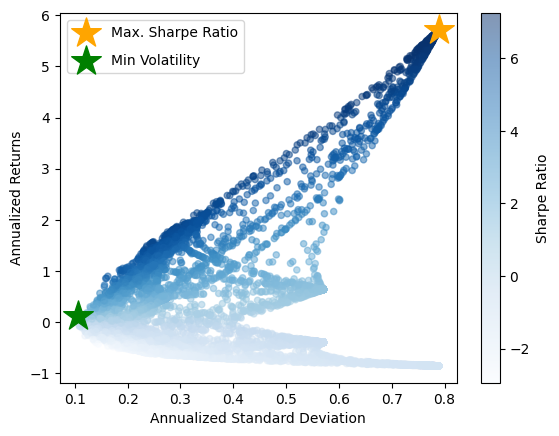

In [15]:
ax = simul_perf.plot.scatter(x=0, y=1, c=2, cmap="Blues", alpha=0.5)
max_sharpe_idx = simul_perf.iloc[:, 2].idxmax()
sd, r = simul_perf.iloc[max_sharpe_idx, :2].values
print(f"Max Sharpe: {sd:.2f}, {r:.2f}")
ax.scatter(sd, r, marker="*", color="orange", s=500, label="Max. Sharpe Ratio")
min_vol_idx = simul_perf.iloc[:, 0].idxmin()
sd, r = simul_perf.iloc[min_vol_idx, :2].values
ax.scatter(sd, r, marker="*", color="green", s=500, label="Min Volatility")
plt.legend(labelspacing=1, loc="upper left")

In [16]:
def portfolio_std(wt, rt=None, cov=None):
    """Annualized PF standard deviation"""
    return np.sqrt(wt @ cov @ wt * periods_per_year)

In [17]:
def portfolio_returns(wt, rt=None, cov=None):
    """Annualized PF returns"""
    return (wt @ rt + 1) ** periods_per_year - 1

In [18]:
def portfolio_performance(wt, rt, cov):
    """Annualized PF returns & standard deviation"""
    r = portfolio_returns(wt, rt=rt)
    sd = portfolio_std(wt, cov=cov)
    return r, sd

In [19]:
def neg_sharpe_ratio(weights, mean_ret, cov):
    r, sd = portfolio_performance(weights, mean_ret, cov)
    return -(r - daily_rate) / sd

In [20]:
weight_constraint = {"type": "eq", "fun": lambda x: np.sum(np.abs(x)) - 1}

In [21]:
def max_sharpe_ratio(mean_ret, cov, short=False):
    return minimize(
        fun=neg_sharpe_ratio,
        x0=x0,
        args=(mean_ret, cov),
        method="SLSQP",
        bounds=((-1 if short else 0, 1),) * n_assets,
        constraints=weight_constraint,
        options={"tol": 1e-10, "maxiter": 1e4},
    )

In [22]:
def min_vol_target(mean_ret, cov, target, short=False):

    def ret_(wt):
        return portfolio_returns(wt, mean_ret)

    constraints = [{"type": "eq", "fun": lambda x: ret_(x) - target}, weight_constraint]

    bounds = ((-1 if short else 0, 1),) * n_assets
    return minimize(
        portfolio_std,
        x0=x0,
        args=(mean_ret, cov),
        method="SLSQP",
        bounds=bounds,
        constraints=constraints,
        options={"tol": 1e-10, "maxiter": 1e4},
    )

In [23]:
def min_vol(mean_ret, cov, short=False):
    bounds = ((-1 if short else 0, 1),) * n_assets

    return minimize(
        fun=portfolio_std,
        x0=x0,
        args=(mean_ret, cov),
        method="SLSQP",
        bounds=bounds,
        constraints=weight_constraint,
        options={"tol": 1e-10, "maxiter": 1e4},
    )

In [24]:
def efficient_frontier(mean_ret, cov, ret_range, short=False):
    return [min_vol_target(mean_ret, cov, ret) for ret in ret_range]

In [25]:
simul_perf, simul_wt = simulate_portfolios(
    mean_returns, cov_matrix, rf_rate=daily_rate, short=False
)

In [26]:
print(simul_perf.describe())

       Annualized Standard Deviation  Annualized Returns  Sharpe Ratio
count                   10000.000000        10000.000000  10000.000000
mean                        0.397364           -0.574476     -1.609357
std                         0.173510            0.157238      0.534078
min                         0.215608           -0.853201     -2.542126
25%                         0.271286           -0.667234     -2.124925
50%                         0.319294           -0.586591     -1.713543
75%                         0.541763           -0.430450     -1.151232
max                         0.788675           -0.319762     -0.685986


In [27]:
simul_max_sharpe = simul_perf.iloc[:, 2].idxmax()
simul_perf.iloc[simul_max_sharpe]

Annualized Standard Deviation    0.570729
Annualized Returns              -0.391349
Sharpe Ratio                    -0.685986
Name: 2574, dtype: float64

In [28]:
max_sharpe_pf = max_sharpe_ratio(mean_returns, cov_matrix, short=False)
max_sharpe_perf = portfolio_performance(max_sharpe_pf.x, mean_returns, cov_matrix)

/var/folders/_f/zmxbx_t93v96nklchvbj6j2r0000gn/T/ipykernel_64155/562071099.py:2: OptimizeWarning: Unknown solver options: tol
  return minimize(fun=neg_sharpe_ratio,


In [29]:
r, sd = max_sharpe_perf
pd.Series({"ret": r, "sd": sd, "sr": (r - daily_rate) / sd})

ret   -0.391349
sd     0.570729
sr    -0.685986
dtype: float64